# Logistic Regression for Identifying Depression Among Students

# Overview
In this task, you will use Logistic Regression to predict whether a student is experiencing depression based on different factors such as academic pressure, sleep habits, and financial stress. You will go through the full machine learning process, from exploring the data to training and evaluating a model. You are also encouraged to create visualizations to better understand the data and support your analysis.

## Dataset
We will use the Student Depression Dataset (good timing after mid term exam I guess).

### Features:
- **Gender**: Male/Female
- **Age**: Student’s age
- **City**: City where the student lives
- **Academic Pressure**: Level of academic stress
- **Work Pressure**: Level of work-related stress
- **CGPA**: Student’s academic performance
- **Study Satisfaction**: How satisfied the student is with their studies
- **Job Satisfaction**: Satisfaction with a job (if applicable)
- **Sleep Duration**: Sleep hours category (e.g., "Less than 5 hours", "5-6 hours")
- **Dietary Habits**: Eating habits (e.g., Healthy, Moderate)
- **Degree**: The degree the student is pursuing
- **Suicidal Thoughts**: Whether the student has had suicidal thoughts (Yes/No)
- **Work/Study Hours**: Hours spent working or studying daily
- **Financial Stress**: Level of financial pressure
- **Family History of Mental Illness**: Whether the student has a family history of mental illness (Yes/No)
- **Depression**: (Target variable: 1 = Has depression, 0 = No depression)

## Tasks
### **Use the df DataFrame from the cell below for all tasks.**
### Task 1 – Explore the Data
    Understand the dataset and find interesting patterns :
        - Use basic pandas functions to check the data.
        - Look for missing values, outliers, and patterns in the features.

### Task 2 – Data Preprocessing
    Clean and prepare the data for modeling : 
        - Handle missing values (e.g., filling or removing them). 
        - Convert categorical variables into numbers using encoding. 
        - Normalize or standardize numerical features if needed.
        - Explain why you made certain preprocessing choices.

### Task 3 – Train the Model
    Train a Logistic Regression model to predict depression : 
        - Split the data into training and testing sets.
        - Train a Logistic Regression model using scikit-learn. Look at the different parameters in scikit learn libraries ant try to change some of them (only if you can understand them).
        - Make predictions on the test data.

### Task 4 – Evaluate the Model
    Measure how well the model performs : 
        - Calculate accuracy, precision, recall, and F1-score.
        - Create a confusion matrix to see how often the model makes correct and incorrect predictions.
        - Plot an ROC curve to analyze model performance.
        - Think on how we could analyse predicted probabilities

#### Some documentation 

[Seaborn Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
[Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)
(There are many different plots and possible analysis to do with Seaborn. Navigate by yourself and feel free to do some insighful analysis)

[Imputing values](https://scikit-learn.org/stable/modules/impute.html)

[scikit-learn preprocessing documentation](https://scikit-learn.org/stable/modules/preprocessing.html)

[Logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

[Classification metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve,auc

df = pd.read_csv("Student Depression Dataset.csv")
df = df.drop(columns=['id'])

In [2]:
# Data Preprocessing

# Let's remove rows with at least one null value
df = df.dropna(axis=0, how="any")

# For Label Encoding: Dietary Habits
# For OHE: Gender, City, Degree 

ohe_set = ['Gender', 'City', 'Degree', 'Profession']
label_set = ['Sleep Duration', 'Dietary Habits', 'Family History of Mental Illness', 'Have you ever had suicidal thoughts ?']
# Encoding nominal variables
ohe_encoder = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
ohe_encoded = ohe_encoder.fit_transform(df[ohe_set])
df = pd.concat([df, ohe_encoded], axis=1) # Inserting encoded columns
df = df.drop(columns=ohe_set) # Removing original column from the dataframe


# Encoding ordinal variable
label_encoder = LabelEncoder()
for col in label_set:
    df[col] = label_encoder.fit_transform(df[col])

# Let's standartize CGPA and Age olumns. THe range of values is wide for them, there are also outliers. So standartization fit's best for them.
scaler = StandardScaler().set_output(transform='pandas')
standartization_set = ['Work/Study Hours', 'CGPA', 'Age']
scaled_columns = scaler.fit_transform(df[standartization_set])
df = df.drop(columns=standartization_set)
df = pd.concat([df, scaled_columns], axis=1)

df.head(10)
df.count()

Academic Pressure            27898
Work Pressure                27898
Study Satisfaction           27898
Job Satisfaction             27898
Sleep Duration               27898
                             ...  
Profession_Teacher           27898
Profession_UX/UI Designer    27898
Work/Study Hours             27898
CGPA                         27898
Age                          27898
Length: 109, dtype: int64

In [3]:
# Splitting the data
y = df['Depression']
x = df.drop(columns=['Depression'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42, shuffle=True)

In [7]:
# Training the model
log_model = LogisticRegression(solver='lbfgs', max_iter=400, random_state = 42)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

confusion matrix:
[[2264  640]
 [ 433 3638]]
Accuracy: 0.8461648745519713, Precision: 0.8503973819541842, Recall: 0.8936379267993122 F1-score: 0.8714816145646185


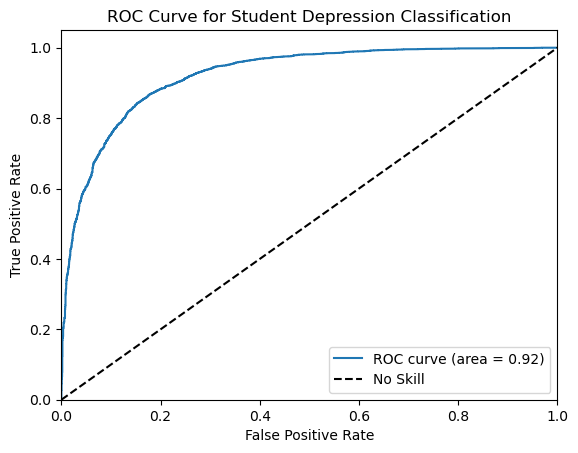

In [9]:
# Creating confusion matrix
matrix = metrics.confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(matrix)

# Estimating the perfomance of a model
TN, FP, FN, TP = matrix[0][0], matrix[0][1], matrix[1][0], matrix[1][1]
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
F1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall} F1-score: {F1}")

# Plotting the ROC curve
y_pred_proba = log_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba) 
roc_auc = metrics.auc(fpr, tpr)
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Student Depression Classification')
plt.legend()
plt.show()

---
---

## Part two
    As we have seen in class, different metrics varry according to the threshold. Explain why.

    Compute the TN, TP, FN and FP manually. 
    Find a way to visualise their evolution according to the threshold. 
    Explain the different variations. What does it tell about your predictions ?

    Do the same with evaluation metrics.

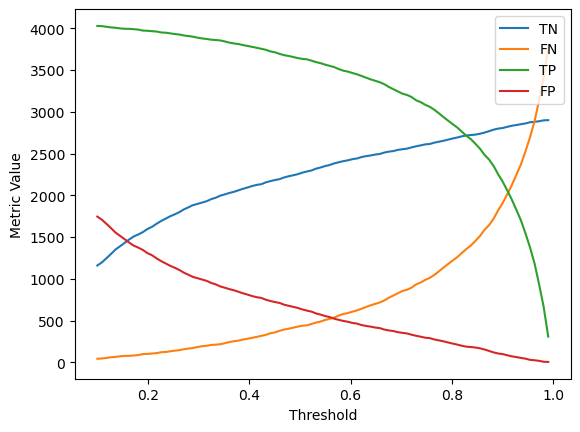

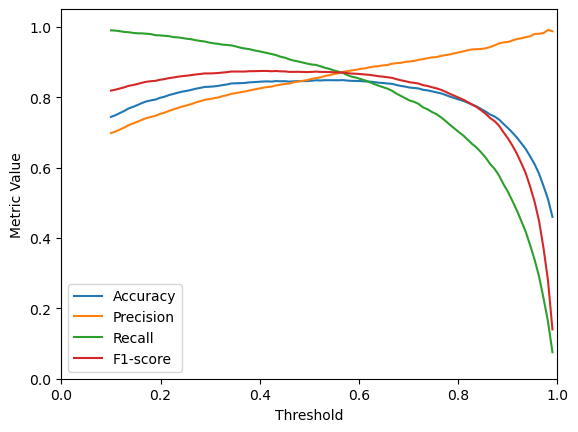

In [11]:
# Visualise evolution of TN, TP, FN, FP and metrics

TN_ev, TP_ev, FN_ev, FP_ev = [], [], [], []

thresholds_list = np.linspace(0.1, 0.99, 100)
accuracy_ev = []
precision_ev = []
recall_ev = []
f1_ev = []

# We will change thresholds using a cycle and store results for metrics in arrays, to build graphs further:
for i in thresholds_list:
    y_pred_new_thres = (log_model.predict_proba(X_test)[:, 1] >= i).astype(int)
    matrix_new_thres = metrics.confusion_matrix(y_test, y_pred_new_thres)

    TN_ev.append(matrix_new_thres[0][0])
    TP_ev.append(matrix_new_thres[1][1])
    FN_ev.append(matrix_new_thres[1][0])
    FP_ev.append(matrix_new_thres[0][1])

    accuracy_new_thres = accuracy_score(y_test, y_pred_new_thres)
    precision_new_thres = precision_score(y_test, y_pred_new_thres)
    recall_new_thres = recall_score(y_test, y_pred_new_thres)
    f1_new_thres = f1_score(y_test, y_pred_new_thres)

    accuracy_ev.append(accuracy_new_thres)
    precision_ev.append(precision_new_thres)
    recall_ev.append(recall_new_thres)
    f1_ev.append(f1_new_thres)

plt.figure() 
plt.plot(thresholds_list, TN_ev, label="TN")
plt.plot(thresholds_list, FN_ev, label="FN")
plt.plot(thresholds_list, TP_ev, label="TP")
plt.plot(thresholds_list, FP_ev, label="FP")
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.legend()
plt.show()

plt.figure() 
plt.plot(thresholds_list, accuracy_ev, label="Accuracy")
plt.plot(thresholds_list, precision_ev, label="Precision")
plt.plot(thresholds_list, recall_ev, label="Recall")
plt.plot(thresholds_list, f1_ev, label="F1-score")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.legend()
plt.show()